## Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics
from sklearn.datasets import load_boston

In [32]:
boston = load_boston()


C:\Users\user\Documents\Git_my_room\LibPython\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [34]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=['price'])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)


In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [44]:
lr.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = lr.predict(X_test)
check_tab = pd.DataFrame({"Тестовые": y_test['price'], "Предсказанные": y_pred.flatten()})
check_tab['Ошибка'] = check_tab['Тестовые'] - check_tab['Предсказанные']
check_tab.head()

,Тестовые,Предсказанные,Ошибка
173,23.6,27.604458,-4.004458
274,32.4,36.137825,-3.737825
491,13.6,17.692195,-4.092195
72,22.8,25.472260,-2.672260
452,16.1,18.582666,-2.482666


## Bcckgdfdsfahsrd

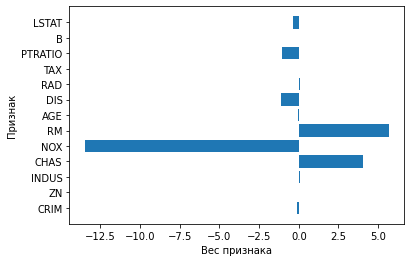

In [104]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

plt.barh(boston['feature_names'], lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()


In [105]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,2.837622,11.119205,10.853642,0.066225,0.552629,6.347642,67.713245,3.842474,9.198675,401.509934,18.417881,357.374702,12.043179
std,5.557822,21.547135,6.643502,0.249503,0.111178,0.645631,27.832656,1.969159,8.564282,164.905705,2.235981,89.686799,6.524481
min,0.013600,0.000000,1.250000,0.000000,0.394000,4.963000,6.500000,1.129600,1.000000,188.000000,13.000000,18.820000,1.730000
25%,0.083175,0.000000,5.040000,0.000000,0.451000,5.937500,45.500000,2.111400,4.000000,276.500000,16.900000,377.005000,6.795000
50%,0.253870,0.000000,8.560000,0.000000,0.538000,6.223000,77.000000,3.421100,5.000000,329.000000,18.700000,392.040000,10.870000
75%,2.591750,20.000000,18.100000,0.000000,0.624000,6.687000,92.250000,5.400900,8.000000,567.500000,20.200000,396.900000,15.860000
max,37.661900,95.000000,27.740000,1.000000,0.871000,8.704000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,31.990000


In [123]:
from sklearn.preprocessing import StandardScaler
scall = StandardScaler()
scall_train = scall.fit_transform(X_train)
scall_train = pd.DataFrame(scall_train, columns=boston['feature_names'])
scall_test = scall.fit_transform(X_test)
scall_test = pd.DataFrame(scall_test, columns=boston['feature_names'])

lr.fit(scall_train, y_train)


LinearRegression()

In [140]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
R2

0.6937147050421199